In [1]:
from pathlib import Path
import json
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import fbeta_score

#Link type map
from tld.linktypes import fine_linktype_map, fine_linktype_to_category_map

In [2]:
# For better Figures
repo_dict = {'apache':'Apache',
 'hyperledger':'Hyperledger',
 'inteldaos':'IntelDAOS',
 'jfrog':'JFrog',
 'jira':'Jira',
 'jiraecosystem':'JiraEcosystem',
 'mariadb':'MariaDB',
 'mojang':'Mojang',
 'mongodb':'MongoDB',
 'qt':'Qt',
 'redhat':'RedHat',
 'sakai':'Sakai',
 'secondlife':'SecondLife',
 'sonatype':'Sonatype',
 'spring':'Spring'}

In [3]:
results_dir = Path.cwd() / 'data' / 'results' 
# results_dir = Path.cwd() / 'data' / 'results_linked' 
# results_dir = Path.cwd() / 'data' / 'results_type' 
# results_dir = Path.cwd() / 'data' / 'results_norel' 
# results_dir = Path.cwd() / 'data' / 'results' / 'distillbert-detailed-results'

class_rep_d = {}
conf_mat_d = {}
REPOS = []

for run_dir in results_dir.iterdir():
    run_name = run_dir.name
    print(run_name)
    if 'linktype' in (run_name.split('_')):
        repo = run_name.split('_')[0]
        REPOS.append(repo_dict[repo])
        
        with (run_dir / 'run_config.json').open('r', encoding='utf8') as f:
            run_config = json.load(f)
        test_output = np.load(run_dir / 'test_output.npz')
        
        lst = test_output.files
            
        class_rep = classification_report(
            test_output['labels'],
            test_output['logits'].argmax(axis=-1),
            target_names=run_config['label_names'],
            output_dict = True
        )
        
        class_rep_df = pd.DataFrame(class_rep).transpose()
        
        class_rep_df.to_csv('data/results/class_rep/class_rep_LT_'+repo+'_plus_DistillBERT.csv')
        
        class_rep_d[repo_dict[repo]] = class_rep_df
        
        conf_mat = confusion_matrix(
            test_output['labels'],
            test_output['logits'].argmax(axis=-1),
            normalize='true'
        )
        conf_mat = np.round(conf_mat, 2)
    
        conf_mat_df = pd.DataFrame(conf_mat, columns=run_config['label_names'], index=run_config['label_names']).transpose()
        conf_mat_d[repo_dict[repo]] = conf_mat_df
        
#Sort Repos alphabetically
REPOS.sort()

sonatype_category_bert-base-uncased_20221027-113756
mongodb_category_bert-base-uncased_20221027-165330
mongodb_linktype_bert-base-uncased_20221027-181046
apache_linktype_bert-base-uncased_20221028-184146
inteldaos_linktype_bert-base-uncased_20221027-112209
hyperledger_category_bert-base-uncased_20221027-133857
qt_category_bert-base-uncased_20221027-151540
apache_category_bert-base-uncased_20221028-135225
qt_linktype_bert-base-uncased_20221027-160423
hyperledger_linktype_bert-base-uncased_20221027-135945
jira_category_bert-base-uncased_20221027-192817
mariadb_linktype_bert-base-uncased_20221027-131839
class_rep
mojang_category_bert-base-uncased_20221028-041831
spring_linktype_bert-base-uncased_20221027-123811
secondlife_linktype_bert-base-uncased_20221027-111447
redhat_category_bert-base-uncased_20221027-234521
inteldaos_category_bert-base-uncased_20221027-111715
redhat_linktype_bert-base-uncased_20221028-020250


/export/home/lueders/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/export/home/lueders/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/export/home/lueders/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sonatype_linktype_bert-base-uncased_20221027-114458
sakai_category_bert-base-uncased_20221027-142034
jiraecosystem_category_bert-base-uncased_20221027-115203
spring_category_bert-base-uncased_20221027-121903
sakai_linktype_bert-base-uncased_20221027-144754
jfrog_linktype_bert-base-uncased_20221027-113228
mariadb_category_bert-base-uncased_20221027-125751
jfrog_category_bert-base-uncased_20221027-112703
mojang_linktype_bert-base-uncased_20221028-090534
secondlife_category_bert-base-uncased_20221027-111230
jira_linktype_bert-base-uncased_20221027-213830
jiraecosystem_linktype_bert-base-uncased_20221027-120533
.ipynb_checkpoints


In [4]:
for s in REPOS:
    beta = np.round(class_rep_d[s]['support'].loc['macro avg']/class_rep_d[s]['support'],0)**2
    pre = class_rep_d[s]['precision']
    rec = class_rep_d[s]['recall']
    class_rep_d[s]['fbeta-score'] = (1+beta)*(pre*rec)/((beta*pre)+rec)
    class_rep_d[s]['fbeta-score'].fillna(0, inplace=True)

In [5]:
for s in REPOS:
    print(class_rep_d[s])

              precision    recall  f1-score       support  fbeta-score
Subtask        0.893193  0.930238  0.911339  16757.000000     0.926396
Relate         0.596921  0.702122  0.645262  14469.000000     0.694918
Duplicate      0.546373  0.396528  0.459544   5185.000000     0.397608
Block          0.555556  0.459807  0.503167   3110.000000     0.460081
Depend         0.520985  0.438893  0.476429   2602.000000     0.439066
Epic           0.951060  0.986411  0.968413   2502.000000     0.986328
Non-Link       0.751592  0.761290  0.756410   2325.000000     0.761272
Incorporate    0.555096  0.514382  0.533964   2086.000000     0.514442
Breaks         0.408882  0.306897  0.350624    870.000000     0.306917
Clone          0.655585  0.570602  0.610149    864.000000     0.570622
Require        0.430894  0.366022  0.395818    724.000000     0.366032
Supercede      0.366755  0.213846  0.270165    650.000000     0.213860
Cause          0.360248  0.280193  0.315217    621.000000     0.280202
accura

In [225]:
print(REPOS)

['Apache', 'Hyperledger', 'IntelDAOS', 'JFrog', 'Jira', 'JiraEcosystem', 'MariaDB', 'Mojang', 'MongoDB', 'Qt', 'RedHat', 'Sakai', 'SecondLife', 'Sonatype', 'Spring']


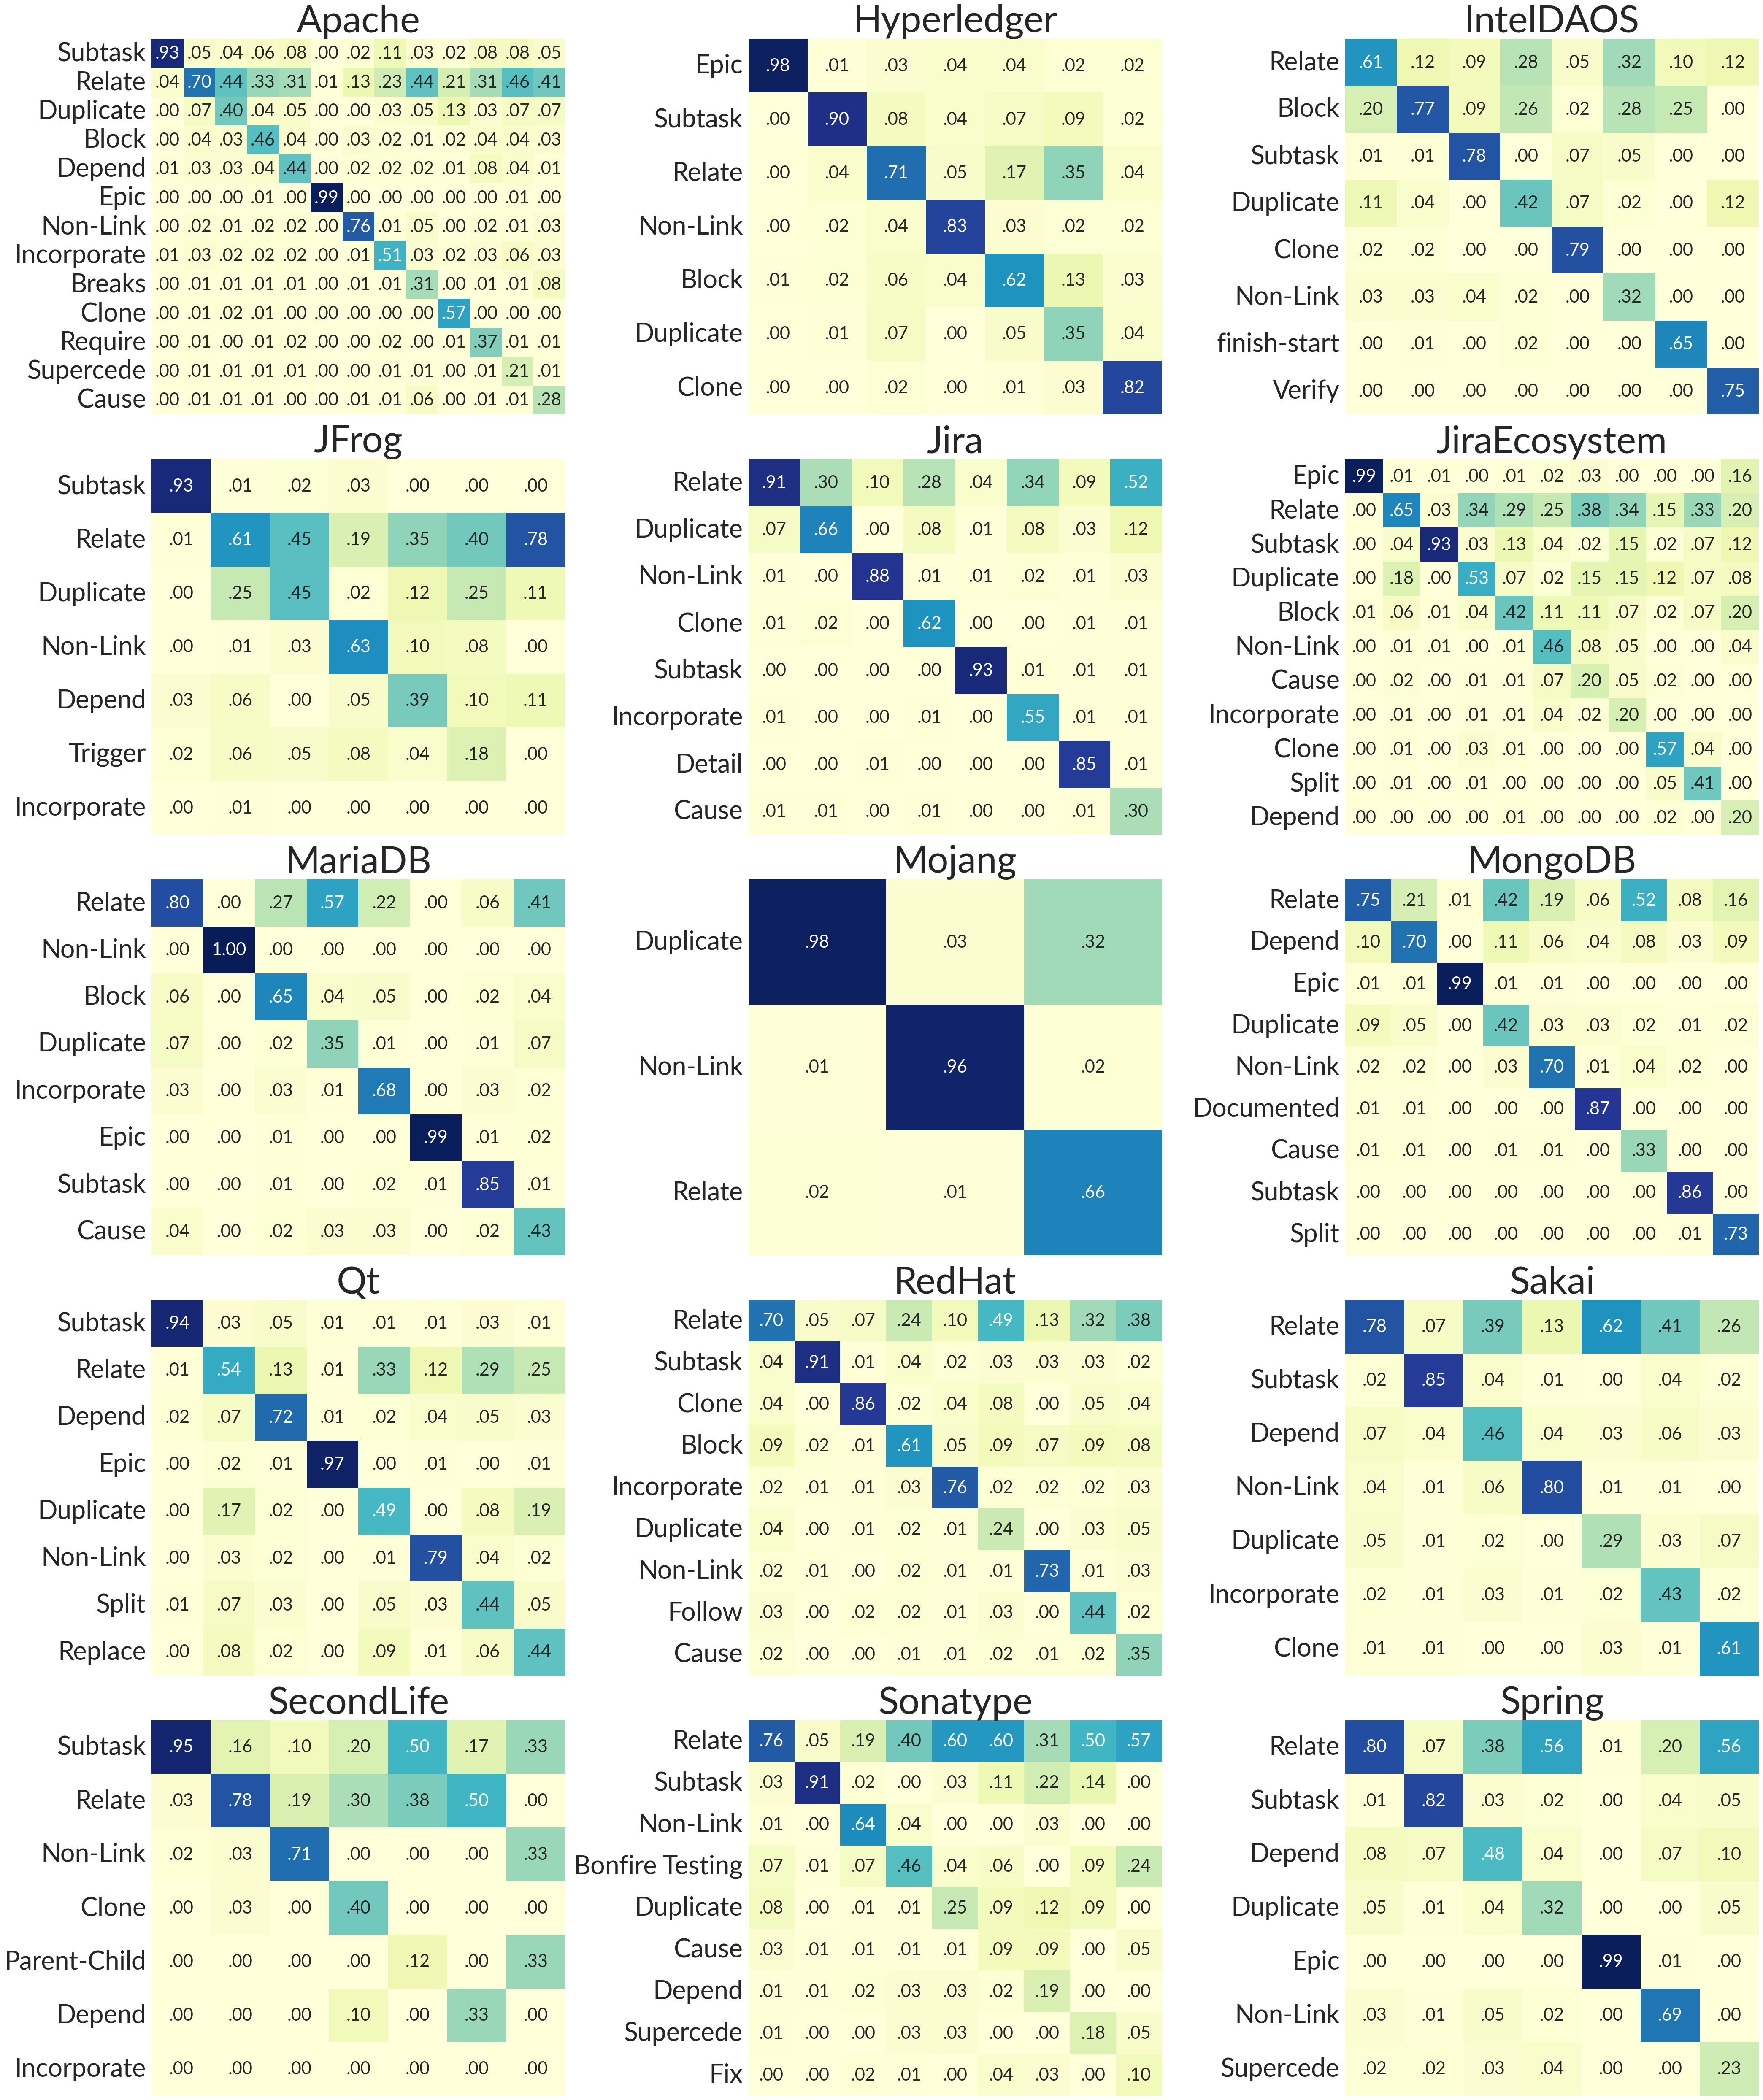

In [274]:
# Plot confusion matrices into one plot and save the figure
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(42, 50))
plt.rc('font', size=14) 

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)

for s, ax in zip(REPOS, axes.flat):
    confmat_df = conf_mat_d[s]
    
    sns.heatmap(confmat_df, ax=ax, cmap="YlGnBu", vmin = 0, vmax = 1, 
                annot=True, cbar = False, xticklabels=False, annot_kws={'size':30, 'fontname': 'Lato'}, fmt='.2f')
    ax.set_title(s, fontdict = {'fontsize': 64, 'fontname': 'Lato'})
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 44, fontdict = {'fontname': 'Lato'})
    for text in ax.texts:
        temp = text.get_text()
        temp = temp.replace("0.", ".")
        text.set_text(temp)
    
# fig.delaxes(axes[4, 2])
plt.tight_layout()

fig.savefig('RepoConfmats_LT.pdf')

In [227]:
#Get different properties of repositories
repos = []
means = []
w_means = []
precs = []
w_precs = []
recs = []
w_recs = []
stds = []
accs = []

#  
#        
for s in REPOS:
    class_rep_df = class_rep_d[s]
    repos.append(s)
    means.append(class_rep_df['f1-score'].loc['macro avg'])
    w_means.append(class_rep_df['f1-score'].loc['weighted avg'])
    precs.append(class_rep_df['precision'].loc['macro avg'])
    w_precs.append(class_rep_df['precision'].loc['weighted avg'])
    recs.append(class_rep_df['recall'].loc['macro avg'])
    w_recs.append(class_rep_df['recall'].loc['weighted avg'])
    accs.append(class_rep_df['f1-score'].loc['accuracy'])
    stds.append(class_rep_df['f1-score'].iloc[:-3].std())
    
stat_dict = {
            'repos': repos,
            'means': means,
            'w_means': w_means,
            'precs': precs,
            'w_precs': w_precs,
            'recs': recs,
            'w_recs': w_recs,
            'stds' : stds,
            'accs': accs,
          }

#Put all numbers into a dataframe for further analysis
stat_df = pd.DataFrame(stat_dict)

In [228]:
stat_df

,repos,means,w_means,precs,w_precs,recs,w_recs,stds,accs
0,Apache,0.553577,0.693271,0.584088,0.691776,0.532864,0.701677,0.218664,0.701677
1,Hyperledger,0.748332,0.849439,0.751549,0.847689,0.746047,0.851588,0.198337,0.851588
2,IntelDAOS,0.661480,0.645979,0.700027,0.657257,0.638087,0.647378,0.178319,0.647378
3,JFrog,0.461210,0.638575,0.471015,0.641420,0.455055,0.640401,0.310797,0.640401
4,Jira,0.739418,0.821618,0.777825,0.820433,0.711021,0.826277,0.192353,0.826277
5,JiraEcosystem,0.527621,0.701043,0.578438,0.701336,0.505270,0.710034,0.237957,0.710034
6,MariaDB,0.724547,0.750259,0.733848,0.747803,0.716646,0.753971,0.230373,0.753971
7,Mojang,0.881516,0.947902,0.901056,0.947227,0.865344,0.949472,0.147040,0.949472
8,MongoDB,0.717095,0.723982,0.734268,0.722334,0.704548,0.728335,0.190735,0.728335
9,Qt,0.666353,0.711097,0.668314,0.710890,0.664853,0.711765,0.215652,0.711765


Starting Notebook.


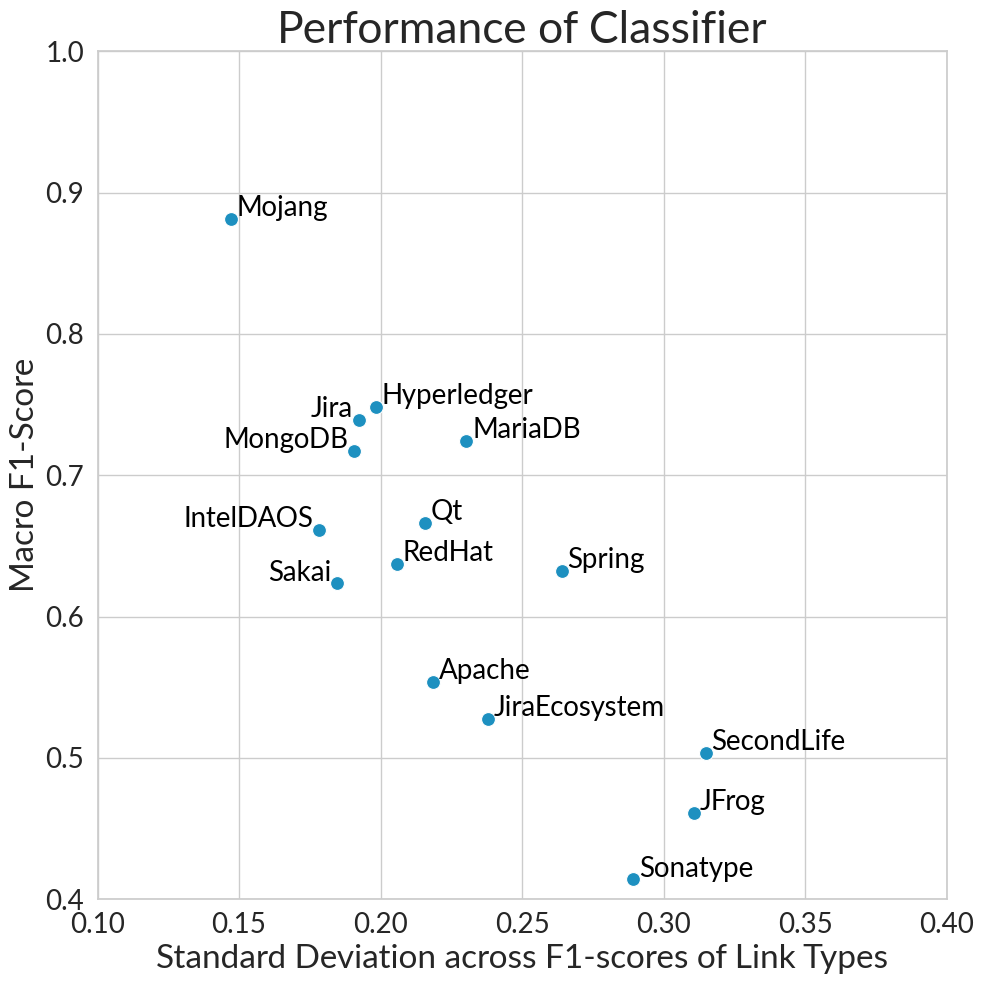

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

print("Starting Notebook.")

sns.set(font_scale = 1)
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10,10))
p1 = sns.scatterplot(x='stds', # Horizontal axis
       y='means', # Vertical axis
       data=stat_df, # Data source
#        size = 'num_predlts',
#         sizes=(200, 2000),
        s=100,
                     color='#1d90c0',
       legend=False)  

for line in range(0,stat_df.shape[0]):
    if line in [2,4, 11,8]:
        p1.text(stat_df.stds[line]-0.002, stat_df.means[line]+0.002, 
        stat_df.repos[line], horizontalalignment='right', 
        size=20, color='black', fontdict={'fontname': 'Lato'})
    else:
        p1.text(stat_df.stds[line]+0.002, stat_df.means[line]+0.002, 
        stat_df.repos[line], horizontalalignment='left', 
        size=20, color='black', fontdict={'fontname': 'Lato'})

# plt.title('Performance per Repository')
plt.xticks(size=20, family = 'Lato')
plt.xlim(0.10, 0.40)
plt.yticks(size=20, family = 'Lato')
plt.ylim(0.4, 1.0)
# Set x-axis label
# plt.xlabel('Accuracy')
plt.tight_layout()
plt.title('Performance of Classifier', fontdict = {'fontsize': 32, 'fontname': 'Lato'})
plt.xlabel('Standard Deviation across F1-scores of Link Types', fontdict = {'fontsize': 24, 'fontname': 'Lato'})
plt.ylabel('Macro F1-Score', fontdict = {'fontsize': 24, 'fontname': 'Lato'})

plt.tight_layout()

blub = p1.get_figure()
blub.savefig('PerformanceBasline.pdf')

In [230]:
pred_types = set()

for s in REPOS:
    filename = 'data/processed/links_plus_'+s.lower()+'.csv'
    links = pd.read_csv(filename, encoding="UTF-8", low_memory=False, index_col=0, sep=';')
    links['mappedtype'] = links['linktype'].map(fine_linktype_map)
    links['cattype'] = links['mappedtype'].map(fine_linktype_to_category_map)

    linktypes = (links.mappedtype.value_counts()>=len(links)*0.01).rename_axis('cattype').reset_index(name='valid')
    valid_types = set(linktypes[linktypes['valid']==True]['cattype'])
    pred_types = pred_types.union(valid_types)
    

In [231]:
pred_lts = set()

for s in REPOS:
    class_rep_df = class_rep_d[s]
    for i in class_rep_df.index:
        pred_lts.add(i)

count_d = {}
  
# iterating through the elements of list
for i in list(pred_lts):
    count_d[i] = 0

for lt in pred_lts:
    for s in REPOS:
        class_rep_df  = class_rep_d[s]
        if lt in class_rep_df.index:
            count_d[lt] += 1

common_lt = []            
for d in count_d:
    if count_d[d]>3 and d not in ['accuracy', 'macro avg', 'weighted avg']:
        common_lt.append(d)

In [232]:
lt_performance_dict = {}

for lt in common_lt:
    lf_dt = pd.DataFrame(columns = ['LT', 'Precision', 'Recall', 'F1', 'Support', 'FBeta', 'Repo'])
#     for s in ['hyperledger', 'inteldaos', 'jfrog', 'jira', 
#            'jiraecosystem', 'mariadb', 'mongodb', 
#            'qt', 'redhat', 'sakai', 'secondlife', 'sonatype', 'spring', 'apache']:
    for s in repos:
        class_rep_df = class_rep_d[s]
        if lt in class_rep_df.index:
            lf_dt.loc[len(lf_dt)] = [lt] + class_rep_df.loc[lt].values.tolist() + [s]
    lt_performance_dict[lt] = lf_dt

In [233]:
lts = []
pre_means = []
pre_stds = []
rec_means = []
rec_stds = []
f1_means = []
f1_stds = []

fb_means = []
fb_stds = []

for lt in common_lt:
    lt_df = lt_performance_dict[lt]
    pre_means.append(np.mean(lt_df['Precision']))
    pre_stds.append(np.std(lt_df['Precision']))
    rec_means.append(np.mean(lt_df['Recall']))
    rec_stds.append(np.std(lt_df['Recall']))
    f1_means.append(np.mean(lt_df['F1']))
    f1_stds.append(np.std(lt_df['F1']))
    fb_means.append(np.mean(lt_df['FBeta']))
    fb_stds.append(np.std(lt_df['FBeta']))
    lts.append(lt)

lt_stat_dict = {
            'lts': lts,
            'pre_means': pre_means,
            'pre_stds' : pre_stds,
            'rec_means': rec_means,
            'rec_stds': rec_stds,
            'f1_means' : f1_means,
            'f1_stds': f1_stds,
            'fb_means' : fb_means,
            'fb_stds': fb_stds,
          }

lt_stat_df = pd.DataFrame(lt_stat_dict)

In [234]:
lt_stat_df

,lts,pre_means,pre_stds,rec_means,rec_stds,f1_means,f1_stds,fb_means,fb_stds
0,Block,0.581357,0.091969,0.588543,0.118950,0.581600,0.094404,0.586250,0.115105
1,Duplicate,0.510237,0.163716,0.439054,0.185802,0.468472,0.173950,0.439137,0.184179
2,Non-Link,0.789806,0.118598,0.726748,0.168957,0.753699,0.144990,0.727103,0.168764
3,Relate,0.663427,0.094033,0.717777,0.091191,0.687447,0.085392,0.710031,0.086330
4,Depend,0.545024,0.141525,0.433904,0.176753,0.474061,0.159309,0.434244,0.177009
5,Clone,0.722681,0.098396,0.654269,0.145221,0.678814,0.112957,0.654361,0.144950
6,Incorporate,0.469443,0.301028,0.389550,0.273720,0.423031,0.284890,0.389687,0.273814
7,Subtask,0.881013,0.045069,0.892832,0.049422,0.886057,0.039230,0.889793,0.046608
8,Epic,0.962997,0.014189,0.984432,0.006622,0.973558,0.009271,0.983690,0.006703
9,Cause,0.397508,0.102807,0.282038,0.101782,0.327480,0.102963,0.282104,0.101771


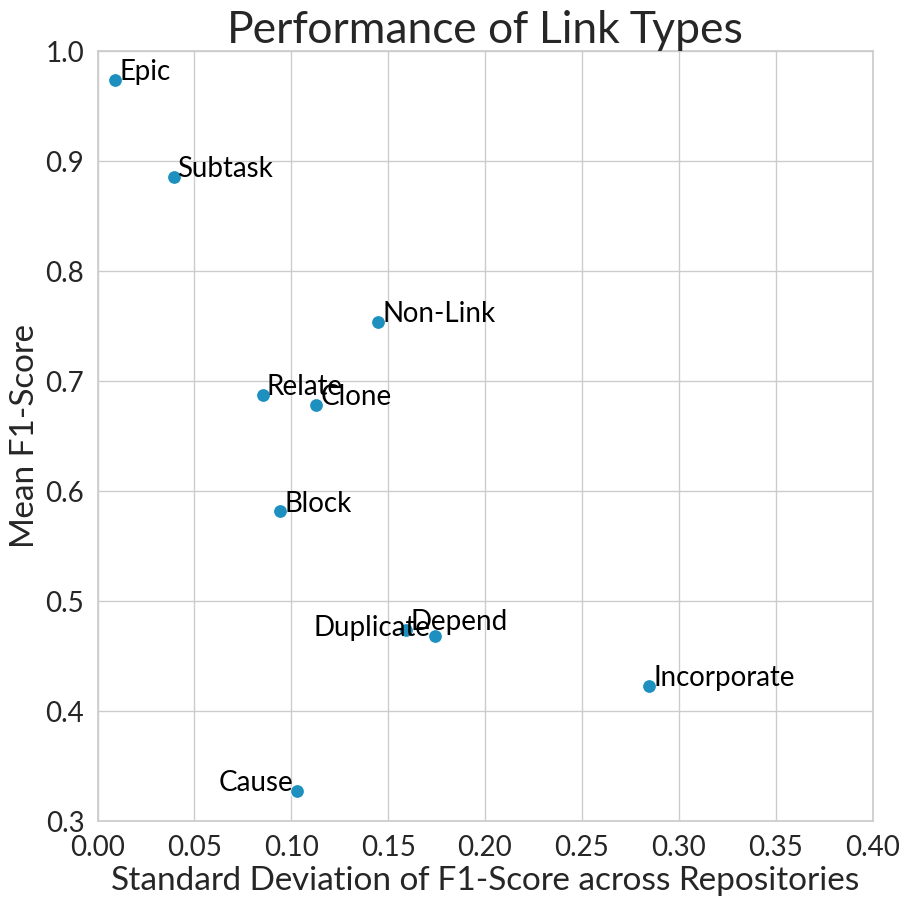

In [235]:
fig = plt.figure(figsize=(10,10))
p1 = sns.scatterplot(x='f1_stds', # Horizontal axis
       y='f1_means', # Vertical axis
       data=lt_stat_df, # Data source
#        size = 'num_predlts',
#         sizes=(200, 2000),
        s=100,
                     color='#1d90c0',
       legend=False)  

for line in range(0,lt_stat_df.shape[0]):
    if line in [1,9]:
        p1.text(lt_stat_df.f1_stds[line]-0.002, lt_stat_df.f1_means[line], 
        lt_stat_df.lts[line], horizontalalignment='right', 
        size=20, color='black', fontdict={'fontname': 'Lato'})
    else:
        p1.text(lt_stat_df.f1_stds[line]+0.002, lt_stat_df.f1_means[line], 
        lt_stat_df.lts[line], horizontalalignment='left', 
        size=20, color='black', fontdict={'fontname': 'Lato'})

# plt.title('Performance per Repository')
plt.xticks(size=20, family = 'Lato')
plt.xlim(0.0, 0.40)
plt.yticks(size=20, family = 'Lato')
plt.ylim(0.3, 1)
# Set x-axis label
# plt.xlabel('Accuracy')
plt.title('Performance of Link Types', fontdict = {'fontsize': 32, 'fontname': 'Lato'})
plt.xlabel('Standard Deviation of F1-Score across Repositories', fontdict = {'fontsize': 24, 'fontname': 'Lato'})
plt.ylabel('Mean F1-Score', fontdict = {'fontsize': 24, 'fontname': 'Lato'})


blub = p1.get_figure()
blub.savefig('PerformanceLinkTypes.pdf')

In [236]:
lt_ov = pd.DataFrame(columns = ['LT', 'Precision', 'Recall', 'F1', 'Support', 'Repo'])
for lt in lt_performance_dict:
    lt_ov = pd.concat([lt_ov, lt_performance_dict[lt]])
    
lt_ov.reset_index(inplace=True)
lt_ov.drop(columns=['index'], inplace = True)

In [237]:
linktypes = ['Relate','Duplicate', 'Subtask', 
                                                           'Depend', 'Clone', 'Incorporate',
                                                           'Epic', 'Block', 'Cause', 'Non-Link']
categories = ['General', 'Composition', 'Duplicate', 'Causal',
                                                  'Workflow', 'Non-Link']

linked = ["Linked", "Non-Link"]

[(0.0, 1.0)]

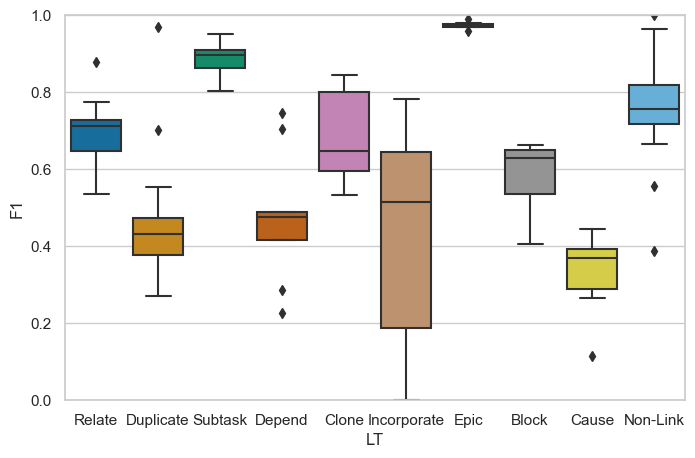

In [238]:
fig = plt.figure(figsize=(8,5))
g = sns.boxplot(x="LT", y="F1", data=lt_ov, order=linktypes,
               palette='colorblind')
g.set(ylim=(0, 1))

# fig.savefig('pics/LT_f1.png')

<AxesSubplot: xlabel='LT', ylabel='Repo'>

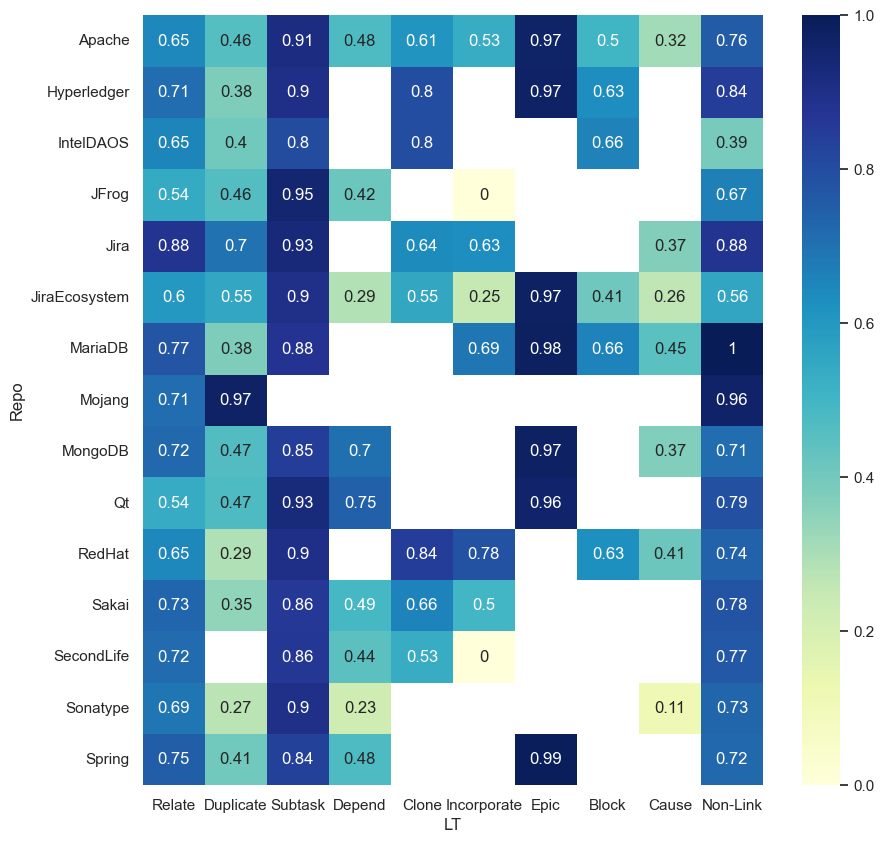

In [239]:
repo_lt_performance_df = pd.pivot_table(lt_ov, values='F1', index=['Repo'],
                    columns=['LT'], aggfunc=np.sum)[linktypes]

fig = plt.figure(figsize=(10,10))
sns.heatmap(repo_lt_performance_df, cmap="YlGnBu", annot=True,vmin=0,vmax=1)


In [240]:
repo_lt_perf_f1_df = repo_lt_performance_df.merge(stat_df[['repos', 'means', 'w_means']], left_on='Repo', right_on='repos')
repo_lt_perf_f1_df.set_index('repos', inplace=True)
repo_lt_perf_f1_df.to_csv('data/overview_LT.csv')
means = np.mean(repo_lt_perf_f1_df)
std = np.std(repo_lt_perf_f1_df)
repo_lt_perf_f1_df.loc['Mean'] = means
repo_lt_perf_f1_df.loc['Standard Dev.'] = std

print(round(repo_lt_perf_f1_df, 2).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Relate &  Duplicate &  Subtask &  Depend &  Clone &  Incorporate &  Epic &  Block &  Cause &  Non-Link &  means &  w\_means \\
repos         &         &            &          &         &        &              &       &        &        &           &        &          \\
\midrule
Apache        &    0.65 &       0.46 &     0.91 &    0.48 &   0.61 &         0.53 &  0.97 &   0.50 &   0.32 &      0.76 &   0.55 &     0.69 \\
Hyperledger   &    0.71 &       0.38 &     0.90 &     NaN &   0.80 &          NaN &  0.97 &   0.63 &    NaN &      0.84 &   0.75 &     0.85 \\
IntelDAOS     &    0.65 &       0.40 &     0.80 &     NaN &   0.80 &          NaN &   NaN &   0.66 &    NaN &      0.39 &   0.66 &     0.65 \\
JFrog         &    0.54 &       0.46 &     0.95 &    0.42 &    NaN &         0.00 &   NaN &    NaN &    NaN &      0.67 &   0.46 &     0.64 \\
Jira          &    0.88 &       0.70 &     0.93 &     NaN &   0.64 &         0.63 &   NaN &    NaN &   

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/tmp/ipykernel_3965930/2864503368.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(round(repo_lt_perf_f1_df, 2).to_latex())


In [241]:
repo_lt_perf_f1_df['means']

repos
Apache           0.553577
Hyperledger      0.748332
IntelDAOS        0.661480
JFrog            0.461210
Jira             0.739418
JiraEcosystem    0.527621
MariaDB          0.724547
Mojang           0.881516
MongoDB          0.717095
Qt               0.666353
RedHat           0.637133
Sakai            0.623446
SecondLife       0.503767
Sonatype         0.413992
Spring           0.632128
Mean             0.632774
Standard Dev.    0.119850
Name: means, dtype: float64

# Correlations

In [6]:
LT_res = pd.read_csv('data/overview_LT.csv')
CAT_res = pd.read_csv('data/overview_CAT.csv')
NOREL_res =pd.read_csv('data/overview_NOREL.csv')
TYPE_res =pd.read_csv('data/overview_TYPE.csv')
LINKED_res =pd.read_csv('data/overview_LINKED.csv')

In [7]:
LT_res

,repos,Relate,Duplicate,Subtask,Depend,Clone,Incorporate,Epic,Block,Cause,Non-Link,means,w_means
0,Apache,0.645262,0.459544,0.911339,0.476429,0.610149,0.533964,0.968413,0.503167,0.315217,0.756410,0.553577,0.693271
1,Hyperledger,0.714029,0.378151,0.899612,NaN,0.800000,NaN,0.970622,0.631579,NaN,0.844334,0.748332,0.849439
2,IntelDAOS,0.654450,0.403846,0.803738,NaN,0.800000,NaN,NaN,0.662379,NaN,0.388060,0.661480,0.645979
3,JFrog,0.542714,0.464000,0.951754,0.416667,NaN,0.000000,NaN,NaN,NaN,0.666667,0.461210,0.638575
4,Jira,0.879564,0.702301,0.929949,NaN,0.637760,0.629977,NaN,NaN,0.368330,0.881988,0.739418,0.821618
5,JiraEcosystem,0.598760,0.553571,0.898002,0.285714,0.547619,0.250000,0.974084,0.407143,0.264706,0.556150,0.527621,0.701043
6,MariaDB,0.774341,0.375494,0.876081,NaN,NaN,0.688742,0.979058,0.656876,0.445783,1.000000,0.724547,0.750259
7,Mojang,0.711761,0.969232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.963557,0.881516,0.947902
8,MongoDB,0.723216,0.465490,0.845304,0.704821,NaN,NaN,0.973825,NaN,0.373684,0.711031,0.717095,0.723982
9,Qt,0.536761,0.474381,0.928769,0.745973,NaN,NaN,0.958106,NaN,NaN,0.791855,0.666353,0.711097


In [11]:
overview = pd.read_csv('data/REJ_DetailedOverviewProjects.csv')
overview

,Repo.,Year,Issues,Links,Comments,ProjectsTotal,IssuesPerProject,LinksPerProject,Projects5Year,Projects2year,...,Cov.,NoResDup,BothResDup,DupIssuesWithoutLinks,DupIssuesWithoutDupLinks,OverlapDupIssuesRefComments,RefComments,IssuesWithRefComm,NoLinkButRefComm,Empty Desc
0,Apache,2000.0,1014637.0,264076.0,4608221.0,646.0,1570.6455,408.7864,522.0,461.0,...,94.3,17.600,3.000,34.1,46.4,54.4,0.246,0.376,0.321,0.03
1,Hyperledger,2016.0,28146.0,16846.0,44590.0,32.0,879.5625,526.4375,32.0,32.0,...,100.0,42.900,0.900,23.9,41.7,12.9,0.089,0.103,0.664,1.79
2,IntelDAOS,2016.0,9474.0,2667.0,32203.0,2.0,4737.0000,1333.5000,2.0,2.0,...,93.3,25.500,4.800,42.3,60.2,42.9,0.308,0.406,0.379,3.80
3,JFrog,2006.0,15535.0,3303.0,13152.0,10.0,1553.5000,330.3000,10.0,9.0,...,93.5,39.300,0.006,19.1,24.4,21.5,0.078,0.055,0.503,13.16
4,Jira,2002.0,274545.0,110507.0,779104.0,30.0,9151.5000,3683.5667,30.0,28.0,...,96.6,16.900,4.400,17.4,26.2,54.0,0.091,0.171,0.670,0.36
5,JiraEcosystem,2004.0,14950.0,12422.0,68387.0,101.0,148.0198,122.9901,83.0,68.0,...,99.1,17.200,2.900,27.5,36.8,38.5,0.125,0.154,0.495,0.16
6,MariaDB,2009.0,31229.0,14906.0,NaN,11.0,2839.0000,1355.0909,11.0,11.0,...,100.0,22.400,3.000,16.8,33.0,NaN,NaN,NaN,NaN,5.45
7,Mindville,2015.0,2134.0,46.0,NaN,7.0,304.8571,6.5714,7.0,7.0,...,100.0,0.471,0.059,58.3,58.3,NaN,NaN,NaN,NaN,25.91
8,Mojang,2012.0,420819.0,215821.0,933348.0,8.0,52602.3750,26977.6250,8.0,8.0,...,100.0,0.004,1.300,0.7,1.1,42.3,0.212,0.403,0.920,0.10
9,MongoDB,2009.0,137172.0,92362.0,368976.0,27.0,5080.4444,3420.8148,27.0,27.0,...,96.7,8.000,5.000,11.9,24.1,32.1,0.478,0.573,0.628,0.96


In [12]:
f1_res = pd.DataFrame()
f1_res['Repo.'] = LT_res['repos']
f1_res['LT_F1'] = LT_res['means']
f1_res['CAT_F1'] = CAT_res['means']
f1_res['NOREL_F1'] = NOREL_res['means']
f1_res = f1_res.merge(LT_res[['means', 'repos']], left_on='Repo.', right_on='repos')
f1_res['TYPE_F1'] = TYPE_res['means']
f1_res['LINKED_F1'] = LINKED_res['means']
f1_res

,Repo.,LT_F1,CAT_F1,NOREL_F1,means,repos,TYPE_F1,LINKED_F1
0,Apache,0.553577,0.662615,0.615170,0.553577,Apache,0.620868,0.969708
1,Hyperledger,0.748332,0.711315,0.790415,0.748332,Hyperledger,0.799917,0.946795
2,IntelDAOS,0.661480,0.682201,0.749119,0.661480,IntelDAOS,0.792503,0.888063
3,JFrog,0.461210,0.553197,0.551018,0.461210,JFrog,0.488748,0.928015
4,Jira,0.739418,0.719083,0.797294,0.739418,Jira,0.782687,0.978236
5,JiraEcosystem,0.527621,0.626404,0.579456,0.527621,JiraEcosystem,0.569577,0.941862
6,MariaDB,0.724547,0.728686,0.821503,0.724547,MariaDB,0.786169,0.934161
7,Mojang,0.881516,0.879681,0.981715,0.881516,Mojang,0.820176,0.987183
8,MongoDB,0.717095,0.725784,0.800441,0.717095,MongoDB,0.735298,0.949438
9,Qt,0.666353,0.627072,0.751702,0.666353,Qt,0.693955,0.961601


In [13]:
corr_df = overview.merge(f1_res, left_on='Repo.', right_on='Repo.')
corr_df['Age'] = 2022-corr_df['Year']

In [14]:
corr_df.columns

Index(['Repo.', 'Year', 'Issues', 'Links', 'Comments', 'ProjectsTotal',
       'IssuesPerProject', 'LinksPerProject', 'Projects5Year', 'Projects2year',
       'ProjectComponents', 'MaintainerTotal', 'IssuesPerMaintainer',
       'LinksPerMaintainer', 'Maintainer5years', 'Maintainer2years',
       'MaintainerComp5', 'MaintainerComp15', 'MaintainerComp25',
       'EmptyIssues', 'PrivateIssues', 'MultiLinks', 'TwiceLinked', 'Coverage',
       'MeanLinks', 'MedianLinks', 'MaxLinks', 'CrossProjectLinks', 'Rel.',
       'Dup.', 'Sub.', 'Clo.', 'Blo.', 'Dep.', 'Epic', 'Spl.', 'Inc.', 'Bon.',
       'Cau.', 'MeanCS', 'MedianCS', 'St.DevCS', 'MeanLen', 'MedianLen',
       'St.DevLen', 'MeanDiff', 'MedianDiff', 'St.DevDiff', 'Cov.', 'NoResDup',
       'BothResDup', 'DupIssuesWithoutLinks', 'DupIssuesWithoutDupLinks',
       'OverlapDupIssuesRefComments', 'RefComments', 'IssuesWithRefComm',
       'NoLinkButRefComm', 'Empty Desc', 'LT_F1', 'CAT_F1', 'NOREL_F1',
       'means', 'repos', 'TYPE_F1',

In [15]:
import scipy.stats as stats

valid_cols = []
ltf1 = []
ltf1_p = []
i='LT_F1'
for j in corr_df.columns:
    try:
        temp = corr_df[[i,j]]
        temp.dropna(inplace=True, axis=0)
        r = stats.pearsonr(temp[i], temp[j])
        if r[1]<0.05:
            valid_cols.append(j)
            ltf1.append(r[0])
            ltf1_p.append(r[1])
    except:
        x=1
            
LT_corr_df = pd.DataFrame(index=valid_cols)
LT_corr_df['Correlation'] = ltf1
LT_corr_df['$p$-Value'] = ltf1_p

/tmp/ipykernel_990594/3056049424.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/3056049424.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/3056049424.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/3056049424.py:10: SettingWithCopyWarning: 
A value is try

In [17]:
LT_corr_df

,Correlation,$p$-Value
LinksPerProject,0.622147,0.013264
IssuesPerMaintainer,0.565478,0.028026
LinksPerMaintainer,0.619115,0.013854
Coverage,0.851445,0.000057
Dup.,0.547054,0.034817
Sub.,-0.752091,0.001220
Cov.,0.523992,0.044969
DupIssuesWithoutLinks,-0.697706,0.003828
DupIssuesWithoutDupLinks,-0.618896,0.013897
NoLinkButRefComm,0.844266,0.000146


In [18]:
import scipy.stats as stats

valid_cols = []
ltf1 = []
ltf1_p = []
i='CAT_F1'
for j in corr_df.columns:
    try:
        temp = corr_df[[i,j]]
        temp.dropna(inplace=True, axis=0)
        r = stats.pearsonr(temp[i], temp[j])
        if r[1]<0.05:
            valid_cols.append(j)
            ltf1.append(r[0])
            ltf1_p.append(r[1])
    except:
        x=1
            
LT_corr_df = pd.DataFrame(index=valid_cols)
LT_corr_df['Correlation'] = ltf1
LT_corr_df['$p$-Value'] = ltf1_p

/tmp/ipykernel_990594/3562933350.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/3562933350.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/3562933350.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/3562933350.py:10: SettingWithCopyWarning: 
A value is try

In [19]:
LT_corr_df

,Correlation,$p$-Value
Coverage,0.605623,0.016726
TYPE_F1,0.596092,0.024465


In [20]:
import scipy.stats as stats

valid_cols = []
ltf1 = []
ltf1_p = []
i='NOREL_F1'
for j in corr_df.columns:
    try:
        temp = corr_df[[i,j]]
        temp.dropna(inplace=True, axis=0)
        r = stats.pearsonr(temp[i], temp[j])
        if r[1]<0.05:
            valid_cols.append(j)
            ltf1.append(r[0])
            ltf1_p.append(r[1])
    except:
        x=1
            
LT_corr_df = pd.DataFrame(index=valid_cols)
LT_corr_df['Correlation'] = ltf1
LT_corr_df['$p$-Value'] = ltf1_p

/tmp/ipykernel_990594/2287042876.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/2287042876.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/2287042876.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/2287042876.py:10: SettingWithCopyWarning: 
A value is try

In [21]:
LT_corr_df

,Correlation,$p$-Value
LinksPerProject,0.586861,0.021457
IssuesPerMaintainer,0.576212,0.024562
LinksPerMaintainer,0.597963,0.018549
MultiLinks,-0.691937,0.004262
Coverage,0.710410,0.002997
Dup.,0.562224,0.029146
Sub.,-0.864917,0.000032
Cov.,0.545296,0.035523
DupIssuesWithoutLinks,-0.609518,0.015854
DupIssuesWithoutDupLinks,-0.555024,0.031743


In [22]:
import scipy.stats as stats

valid_cols = []
ltf1 = []
ltf1_p = []
i='TYPE_F1'
for j in corr_df.columns:
    try:
        temp = corr_df[[i,j]]
        temp.dropna(inplace=True, axis=0)
        r = stats.pearsonr(temp[i], temp[j])
        if r[1]<0.05:
            valid_cols.append(j)
            ltf1.append(r[0])
            ltf1_p.append(r[1])
    except:
        x=1
            
LT_corr_df = pd.DataFrame(index=valid_cols)
LT_corr_df['Correlation'] = ltf1
LT_corr_df['$p$-Value'] = ltf1_p

/tmp/ipykernel_990594/4120678112.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/4120678112.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/4120678112.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/4120678112.py:10: SettingWithCopyWarning: 
A value is try

In [23]:
LT_corr_df

,Correlation,$p$-Value
Sub.,-0.577872,0.030436
LT_F1,0.636055,0.014477
CAT_F1,0.596092,0.024465
NOREL_F1,0.645761,0.012610
means,0.636055,0.014477


In [24]:
import scipy.stats as stats

valid_cols = []
ltf1 = []
ltf1_p = []
i='LINKED_F1'
for j in corr_df.columns:
    try:
        temp = corr_df[[i,j]]
        temp.dropna(inplace=True, axis=0)
        r = stats.pearsonr(temp[i], temp[j])
        if r[1]<0.05:
            valid_cols.append(j)
            ltf1.append(r[0])
            ltf1_p.append(r[1])
    except:
        x=1
            
LT_corr_df = pd.DataFrame(index=valid_cols)
LT_corr_df['Correlation'] = ltf1
LT_corr_df['$p$-Value'] = ltf1_p

/tmp/ipykernel_990594/2790334546.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/2790334546.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/2790334546.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True, axis=0)
/tmp/ipykernel_990594/2790334546.py:10: SettingWithCopyWarning: 
A value is try

In [25]:
LT_corr_df

,Correlation,$p$-Value
Issues,0.589065,0.020854
Links,0.694188,0.004088
MultiLinks,-0.542278,0.036762
Empty Desc,-0.642454,0.009801


# Class Correlations

In [258]:
# Results from Link Type Properties
textdiff_df = pd.read_csv('data/text_diff.csv', encoding="UTF-8", low_memory=False, sep=",")
textdiff_df.drop('Non-Link', axis=1, inplace=True)
textlen_df = pd.read_csv('data/text_lengths.csv', encoding="UTF-8", low_memory=False, sep=",")
textlen_df.drop('Non-Link', axis=1, inplace=True)
cossim_df = pd.read_csv('data/cosine_similarities.csv', encoding="UTF-8", low_memory=False, sep=",")
cossim_df.drop('Non-Link', axis=1, inplace=True)

freqlt_df = pd.read_csv('data/Frequencies.csv', encoding="UTF-8", low_memory=False, sep=",", index_col=0)
freq_df = pd.read_csv('data/DetailedFrequencies.csv', encoding="UTF-8", low_memory=False, sep=",", index_col=0)

diff_d = textdiff_df.mean().to_dict()
len_d = textlen_df.mean().to_dict()
cossim_d = cossim_df.mean().to_dict()

freqlt_d = freqlt_df['share'].to_dict()
freq_d = freq_df.to_dict()

/tmp/ipykernel_3965930/2827361119.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  diff_d = textdiff_df.mean().to_dict()
/tmp/ipykernel_3965930/2827361119.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  len_d = textlen_df.mean().to_dict()
/tmp/ipykernel_3965930/2827361119.py:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_o

In [259]:
lt_stat_df['counts'] = lt_stat_df['lts'].map(count_d)
lt_stat_df['diffs'] = lt_stat_df['lts'].map(diff_d)
lt_stat_df['lens'] = lt_stat_df['lts'].map(len_d)
lt_stat_df['cossim'] = lt_stat_df['lts'].map(cossim_d)
lt_stat_df['share'] = lt_stat_df['lts'].map(freqlt_d)

In [260]:
lt_stat_df

,lts,pre_means,pre_stds,rec_means,rec_stds,f1_means,f1_stds,fb_means,fb_stds,counts,diffs,lens,cossim,share
0,Block,0.581357,0.091969,0.588543,0.118950,0.581600,0.094404,0.586250,0.115105,6,61.454545,169.545455,0.240909,7.041131
1,Duplicate,0.510237,0.163716,0.439054,0.185802,0.468472,0.173950,0.439137,0.184179,14,54.933333,190.800000,0.362000,18.447861
2,Non-Link,0.789806,0.118598,0.726748,0.168957,0.753699,0.144990,0.727103,0.168764,15,NaN,NaN,NaN,NaN
3,Relate,0.663427,0.094033,0.717777,0.091191,0.687447,0.085392,0.710031,0.086330,15,52.687500,185.875000,0.291250,34.814555
4,Depend,0.545024,0.141525,0.433904,0.176753,0.474061,0.159309,0.434244,0.177009,9,36.700000,113.300000,0.199000,8.593265
5,Clone,0.722681,0.098396,0.654269,0.145221,0.678814,0.112957,0.654361,0.144950,8,8.571429,138.357143,0.830000,4.490440
6,Incorporate,0.469443,0.301028,0.389550,0.273720,0.423031,0.284890,0.389687,0.273814,8,54.375000,137.500000,0.151250,4.430863
7,Subtask,0.881013,0.045069,0.892832,0.049422,0.886057,0.039230,0.889793,0.046608,14,26.500000,68.571429,0.095714,20.893135
8,Epic,0.962997,0.014189,0.984432,0.006622,0.973558,0.009271,0.983690,0.006703,7,38.375000,79.625000,0.045000,14.519144
9,Cause,0.397508,0.102807,0.282038,0.101782,0.327480,0.102963,0.282104,0.101771,7,75.142857,215.428571,0.184286,3.205303


In [261]:
lt_stat_df = lt_stat_df[lt_stat_df['lts']!='Non-Link']

In [262]:
# temp = lt_stat_df.drop(9, axis=0)
for j in ['counts', 'diffs', 'lens', 'cossim']:
    print(j)
    r = stats.pearsonr(lt_stat_df['f1_means'], lt_stat_df[j])
    print(np.round(r,4))
    
# does not include non-links
print('share')
print(temp)
# r = stats.pearsonr(temp['f1_means'], temp[j])
# print(np.round(r,4))

counts
[0.192  0.6206]
diffs
[-0.5911  0.0937]
lens
[-0.7253  0.027 ]
cossim
[-0.1143  0.7697]
share
    LINKED_F1   Age
0    0.969708  22.0
1    0.946795   6.0
2    0.888063   6.0
3    0.928015  16.0
4    0.978236  20.0
5    0.941862  18.0
6    0.934161  13.0
7    0.987183  10.0
8    0.949438  13.0
9    0.961601  19.0
10   0.960408  21.0
11   0.943560  18.0
12   0.897232  15.0
13   0.952354  14.0
14   0.939138  19.0


In [263]:
lt_corr_df = pd.DataFrame(columns = ['LT', 'Precision', 'Recall', 'F1', 'Support', 'FBeta', 'Repo'])
for lt in common_lt:
    for s in REPOS:
        class_rep_df = class_rep_d[s]
        if lt in class_rep_df.index:
            lt_corr_df.loc[len(lt_corr_df)] = [lt] + class_rep_df.loc[lt].values.tolist() + [s]

In [264]:
lt_corr_df['part'] = 0

for s in REPOS:
    temp_df = lt_corr_df[lt_corr_df['Repo'] == s]
#     print(temp_df)
    total_supp = np.sum(temp_df['Support'])
#     print(s)
    for i in temp_df.index:
#         print(i)
#         print(temp_df.loc[i])
        avg = temp_df.loc[i]['Support']/total_supp
#         print(avg)
        lt_corr_df['part'].loc[i] = avg

/tmp/ipykernel_3965930/1203202361.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_corr_df['part'].loc[i] = avg


In [265]:
cossim_df

,Repo,Relate,Duplicate,Subtask,Clone,Block,Depend,Epic,Split,Incorporate,Bonfire Testing,Cause
0,Apache,0.14,0.29,0.00,0.90,0.03,0.08,0.00,0.30,0.07,0.19,0.09
1,Hyperledger,0.33,0.44,0.21,0.95,0.31,NaN,0.06,0.06,NaN,0.36,NaN
2,IntelDAOS,0.18,0.30,0.07,0.89,0.11,NaN,NaN,NaN,NaN,NaN,NaN
3,JFrog,0.37,0.39,0.00,1.00,NaN,0.29,NaN,NaN,0.26,NaN,NaN
4,Jira,0.89,0.43,0.06,0.93,0.29,0.49,NaN,0.25,0.40,0.32,0.34
5,JiraEcosystem,0.26,0.48,0.00,0.94,0.13,0.15,0.00,0.45,0.13,0.17,0.24
6,MariaDB,0.25,0.32,0.06,NaN,0.22,NaN,0.00,0.22,0.13,NaN,0.13
7,Mojang,0.25,0.21,NaN,0.39,0.20,NaN,NaN,NaN,NaN,0.27,NaN
8,MongoDB,0.17,0.30,0.16,1.00,NaN,0.24,0.00,0.38,NaN,NaN,0.13
9,Mindville,0.40,0.50,NaN,0.97,0.92,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
textdiff_df_m = textdiff_df.reset_index().melt('Repo', var_name='LT', value_name='diff')
textlen_df_m = textlen_df.reset_index().melt('Repo', var_name='LT', value_name='len')
cossim_df_m = cossim_df.reset_index().melt('Repo', var_name='LT', value_name='cossim')

In [267]:
temp = lt_corr_df.merge(textdiff_df_m, how='inner', left_on=['Repo', 'LT'], right_on=['Repo', 'LT'])
temp = temp.merge(textlen_df_m, how='inner', left_on=['Repo', 'LT'], right_on=['Repo', 'LT'])
temp = temp.merge(cossim_df_m, how='inner', left_on=['Repo', 'LT'], right_on=['Repo', 'LT'])
temp.columns

Index(['LT', 'Precision', 'Recall', 'F1', 'Support', 'FBeta', 'Repo', 'part',
       'diff', 'len', 'cossim'],
      dtype='object')

In [268]:
common_lt

['Block',
 'Duplicate',
 'Non-Link',
 'Relate',
 'Depend',
 'Clone',
 'Incorporate',
 'Subtask',
 'Epic',
 'Cause']

In [269]:
temp.LT.value_counts()

Relate         15
Duplicate      14
Subtask        14
Depend          9
Clone           8
Incorporate     8
Epic            7
Cause           7
Block           6
Name: LT, dtype: int64

In [270]:
for lt in ['Relate', 'Duplicate', 'Subtask', 'Depend', 'Clone', 'Incorporate', 'Epic', 'Block', 'Cause']:
    temp_df = temp[(temp['LT']==lt)&(temp['Repo']!='Mojang')]
    print(lt)
    for j in ['Support', 'part', 'len', 'diff', 'cossim']:
        r = stats.pearsonr(temp_df['F1'], temp_df[j])
#         if r[1]<0.05:
        print(j)
        print(np.round(r,2))
    print('-------------')

Relate
Support
[0.32 0.26]
part
[0.74 0.  ]
len
[0.33 0.24]
diff
[-0.  1.]
cossim
[0.5  0.07]
-------------
Duplicate
Support
[0.54 0.05]
part
[0.83 0.  ]
len
[-0.16  0.6 ]
diff
[-0.16  0.59]
cossim
[0.2  0.52]
-------------
Subtask
Support
[0.25 0.39]
part
[0.38 0.18]
len
[-0.51  0.06]
diff
[-0.34  0.23]
cossim
[-0.07  0.82]
-------------
Depend
Support
[0.65 0.06]
part
[0.88 0.  ]
len
[-0.  1.]
diff
[0.1  0.81]
cossim
[0.11 0.77]
-------------
Clone
Support
[0.51 0.2 ]
part
[0.57 0.14]
len
[-0.33  0.43]
diff
[-0.68  0.06]
cossim
[0.56 0.15]
-------------
Incorporate
Support
[0.6  0.11]
part
[0.79 0.02]
len
[0.02 0.96]
diff
[-0.02  0.95]
cossim
[0.06 0.88]
-------------
Epic
Support
[-0.49  0.26]
part
[-0.19  0.69]
len
[-0.71  0.08]
diff
[-0.67  0.1 ]
cossim
[-0.13  0.78]
-------------
Block
Support
[-0.05  0.92]
part
[0.64 0.17]
len
[0.64 0.17]
diff
[0.66 0.15]
cossim
[0.43 0.4 ]
-------------
Cause
Support
[0.46 0.3 ]
part
[-0.38  0.41]
len
[0.47 0.29]
diff
[0.44 0.32]
cossim
[-0.18

In [271]:
import itertools
x = ['Epic', 'Subtask', 'Relate', 'Clone', 'Block', 'Incorporate', 'Duplicate','Depend', 'Cause']
y = list(itertools.combinations(x, 2))
print(len(y))

for (lt1, lt2) in y:
    count = 0
    lt1_f1 = []
    lt2_f1 = []
    temp_df1 = temp[temp['LT'].isin([lt1, lt2])]
    for r in REPOS:
        temp_df2 = temp_df1[temp_df1['Repo']==r]
        if (len(temp_df2) == 2):
            lt1_f1.append(temp_df2[temp_df2['LT']==lt1]['F1'].iloc[0])
            lt2_f1.append(temp_df2[temp_df2['LT']==lt2]['F1'].iloc[0])
            count+=1
#     print(lt1_f1)
#     print(lt2_f1)
    r = stats.pearsonr(lt1_f1, lt2_f1)
    if r[1]<0.05:
            print(lt1 + " and " + lt2)
            print(count)
            print(np.round(r,4))
            print('------------')
    

36
Epic and Subtask
7
[-0.8526  0.0148]
------------
Epic and Relate
7
[0.7616 0.0467]
------------
Clone and Block
5
[0.962  0.0088]
------------
Clone and Incorporate
6
[0.8407 0.036 ]
------------
Block and Duplicate
6
[-0.8529  0.0309]
------------
Block and Cause
4
[0.9929 0.0071]
------------
Incorporate and Cause
5
[0.9033 0.0356]
------------


# Graph Theory Correlations

In [272]:
results_dir = Path.cwd() / 'data' / 'category' 
cat_metrics = {}

for run_dir in results_dir.iterdir():
    run_name = run_dir.name
    try:
        temp_df = pd.read_csv(results_dir / run_name)
        cat_metrics[run_name.split('_')[1].split('.')[0]] = temp_df
    except:
        x=0

results_dir = Path.cwd() / 'data' / 'linktype' 
lt_metrics = {}

for run_dir in results_dir.iterdir():
    run_name = run_dir.name
    try:
        temp_df = pd.read_csv(results_dir / run_name)
        lt_metrics[run_name.split('_')[1].split('.')[0]] = temp_df
    except:
        x=0      

In [273]:
temp_LT = LT_res
for lt in LT_res.columns:
    try:
        print(lt)
    #     try:
        temp_met = lt_metrics[lt].set_index('source')
        temp_merge = temp_LT[[lt,'repos']].merge(temp_met, left_on='repos', right_on='source').set_index('repos').dropna(axis='index')
        for c in ['num_edges', 'per_orphans', 'per_3_comp', 'assortativity', 
                  'transitivity', 'per_cycles', 'per_star', 'avg_dens', 'num_issues']:
            r = stats.pearsonr(temp_merge[c], temp_merge[lt])
            if r[1]<0.05:
                print(c)
                print(np.round(r,4))
        print('__________________')
    except:
        print("nope")

repos
nope
Relate
per_orphans
[-0.7182  0.0026]
per_cycles
[0.7605 0.001 ]
per_star
[-0.5767  0.0244]
__________________
Duplicate
num_edges
[8.403e-01 2.000e-04]
per_orphans
[-0.8857  0.    ]
per_3_comp
[0.9415 0.    ]
assortativity
[-0.7205  0.0036]
transitivity
[-0.608   0.0211]
avg_dens
[-0.931  0.   ]
__________________
Subtask
__________________
Depend
per_orphans
[-0.7593  0.0176]
per_3_comp
[0.7719 0.0148]
per_cycles
[0.7739 0.0144]
avg_dens
[-0.6718  0.0475]
__________________
Clone
per_3_comp
[0.7076 0.0496]
__________________
Incorporate
per_orphans
[-0.7349  0.0378]
transitivity
[0.833  0.0102]
per_cycles
[0.9165 0.0014]
per_star
[-0.9765  0.    ]
__________________
Epic
__________________
Block
per_orphans
[-0.9261  0.008 ]
per_3_comp
[0.8539 0.0304]
assortativity
[-0.9118  0.0113]
transitivity
[-0.8121  0.0497]
avg_dens
[-0.867   0.0254]
__________________
Cause
per_3_comp
[0.7791 0.039 ]
per_star
[-0.7967  0.032 ]
__________________
Non-Link
nope
means
nope
w_means
nope


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
temp_LT = CAT_res
for lt in temp_LT.columns:
    try:
        print(lt)
    #     try:
        temp_met = cat_metrics[lt].set_index('source')
        temp_merge = temp_LT[[lt,'repos']].merge(temp_met, left_on='repos', right_on='source').set_index('repos').dropna(axis='index')
        for c in ['num_edges', 'per_orphans', 'per_3_comp', 'assortativity', 
                  'transitivity', 'per_cycles', 'per_star', 'avg_dens', 'num_issues']:
            r = stats.pearsonr(temp_merge[c], temp_merge[lt])
            if r[1]<0.05:
                print(c)
                print(np.round(r,4))
        print('__________________')
    except:
        print("nope")

In [ ]:
temp_LT = NOREL_res
for lt in temp_LT.columns:
    try:
        print(lt)
    #     try:
        temp_met = lt_metrics[lt].set_index('source')
        temp_merge = temp_LT[[lt,'repos']].merge(temp_met, left_on='repos', right_on='source').set_index('repos').dropna(axis='index')
        for c in ['num_edges', 'per_orphans', 'per_3_comp', 'assortativity', 
                  'transitivity', 'per_cycles', 'per_star', 'avg_dens', 'num_issues']:
            r = stats.pearsonr(temp_merge[c], temp_merge[lt])
            if r[1]<0.05:
                print(c)
                print(np.round(r,4))
        print('__________________')
    except:
        print("nope")

In [ ]:
temp_LT = LINKED_res
for lt in temp_LT.columns:
    try:
        print(lt)
    #     try:
        temp_met = lt_metrics[lt].set_index('source')
        temp_merge = temp_LT[[lt,'repos']].merge(temp_met, left_on='repos', right_on='source').set_index('repos').dropna(axis='index')
        for c in ['num_edges', 'per_orphans', 'per_3_comp', 'assortativity', 
                  'transitivity', 'per_cycles', 'per_star', 'avg_dens', 'num_issues']:
            r = stats.pearsonr(temp_merge[c], temp_merge[lt])
            if r[1]<0.05:
                print(c)
                print(np.round(r,4))
        print('__________________')
    except:
        print("nope")